In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'

In [3]:
ds = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80*'))] #local

In [4]:

Te = [d.E_u_avg.sel(param='Tt') for d in ds]#[xr.concat([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')],dim='ybin') for d in ds]
Tl = [d.L_u_avg.sel(param='Tt') for d in ds]#[xr.concat([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')],dim='ybin') for d in ds]
Tbe = [d.E_u_avg.sel(param='Tb') for d in ds]#[xr.concat([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')],dim='ybin') for d in ds]
Tbl = [d.L_u_avg.sel(param='Tb') for d in ds]#[xr.concat([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')],dim='ybin') for d in ds]
Ubar = [d.Uprime for d in ds]

In [91]:
Te_sat = [Te[i].where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True) for i in range(len(Tl))]
Tl_sat = [Tl[i].where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True) for i in range(len(Tl))]
Tbe_sat = [Tbe[i].where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True) for i in range(len(Tl))]
Tbl_sat = [Tbl[i].where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True) for i in range(len(Tl))]
Ubar_sat = [Ubar[i].where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True) for i in range(len(Tl))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

ValueError: dimensions {'ybin'} do not exist. Expected one or more of ('y_rho',)

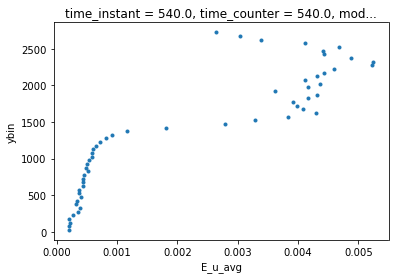

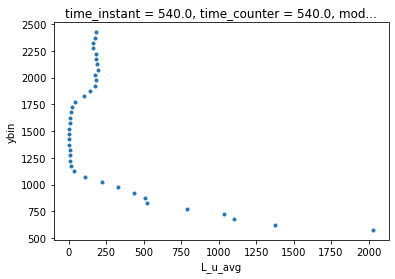

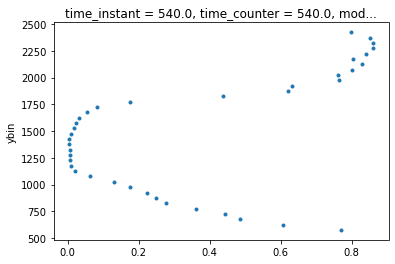

In [88]:
(1/Te[0]).plot.line('.',y='ybin')
plt.figure()
(Tl[0]).plot.line('.',y='ybin')
plt.figure()
(Tl[0]/Te[0]).plot.line('.',y='ybin')

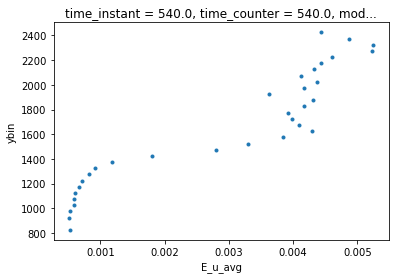

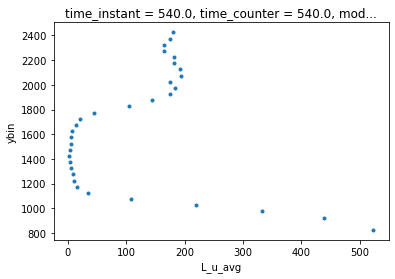

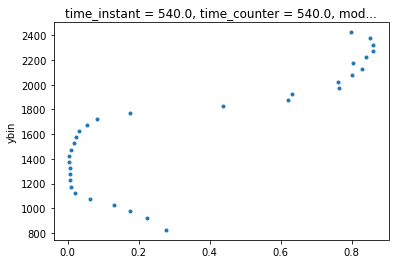

In [92]:
(1/Te_sat[0]).plot.line('.',y='ybin')
plt.figure()
(Tl_sat[0]).plot.line('.',y='ybin')
plt.figure()
(Tl_sat[0]/Te_sat[0]).plot.line('.',y='ybin')


In [94]:
Te_sat[-1]

<xarray.DataArray 'E_u_avg' (ybin: 37)>
array([997.67507856, 914.04919308, 816.62315592, 899.52725079,
       748.10708793, 709.01630162, 654.75639974, 623.5323544 ,
       540.32232634, 426.85857394, 359.71241092, 295.30538967,
       260.44311025, 207.00816235, 147.25222625, 104.7609759 ,
        80.91290963,  38.76878132,  31.71346284,  25.97507041,
        25.42601713,  25.17958523,  23.81443202,  21.73838835,
        24.2787315 ,  24.2152497 ,  20.10937841,  22.43651036,
        26.82645784,  21.30612606,  16.97154138,  19.16900282,
        22.43999528,  21.44450392,  19.80628279,  19.28752423,
        20.72325413])
Coordinates:
  * ybin          (ybin) float64 575.0 625.0 675.0 ... 2.425e+03 2.475e+03
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'

In [95]:
def phi_mu(tau,Tbar):
    return 1-np.exp(-tau/Tbar)
def phi_sigma(tau,Tbar):
    return 1-2*(1-np.exp(-tau/Tbar))/tau+(1+np.exp(-2*tau/Tbar))/(2*tau)

In [96]:
vmodes = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_waves_modes*'))] #local
Lt = [vm.lwave.sel(mode=1) for vm in vmodes]

In [98]:
Tbmean = [(Tbe[i]+Tbl[i])/2 for i,x in enumerate(Tbe)]
Tbmean_sat = [(Tbe_sat[i]+Tbl_sat[i])/2 for i,x in enumerate(Tbe_sat)]

In [99]:
for i in range(len(Lt)):
    Lt[i] = Lt[i].assign_coords({'y_rho':Lt[i].y_rho.values*1e-3})

In [100]:
phi_sigma(Tl[i],Tbmean[i])

<xarray.DataArray (ybin: 55)>
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.99009071, 0.98614012, 0.98402489, 0.98135757,
       0.97624592, 0.96968922, 0.95932834, 0.95707327, 0.98041533,
       1.00118585, 1.01688475, 1.10990634, 1.14402226, 1.1593611 ,
       1.24660358, 1.35522179, 1.69538892, 1.91740071, 1.90615347,
       1.69543613, 1.48659752, 1.17899777, 1.12296595, 1.07690391,
       1.04481938, 1.09081572, 1.27915646, 1.08395748, 1.01975099,
       1.00638988, 0.92429689, 0.92065553, 0.97915367, 0.98443993,
       0.90322123, 0.93894027, 0.95214527, 0.90587083, 0.9431771 ,
              nan,        nan,        nan,        nan,        nan])
Coordinates:
  * ybin          (ybin) float64 25.0 75.0 125.0 ... 2.675e+03 2.725e+03
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'

(0.0, 10.0)

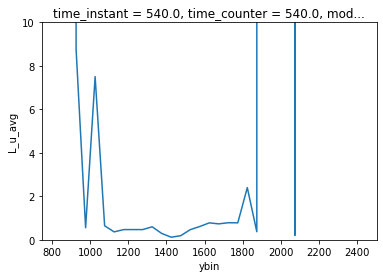

In [163]:
i=0
(Tl_sat[i]/Tbl_sat[i]).plot()
plt.ylim(0,10)
#for i in range(len(Tl)):
#    plt.plot(Tl[i]/Tbl[i])

$\phi_{\mu}(\tau/\bar T)=1-e^{-\tau/\bar T}$

$\phi_{\sigma}(\tau/\bar T)=1 - 2 (1-e^{-\tau/\bar T})/\tau + (1-e^{-2\tau/\bar T})/(2\tau)$

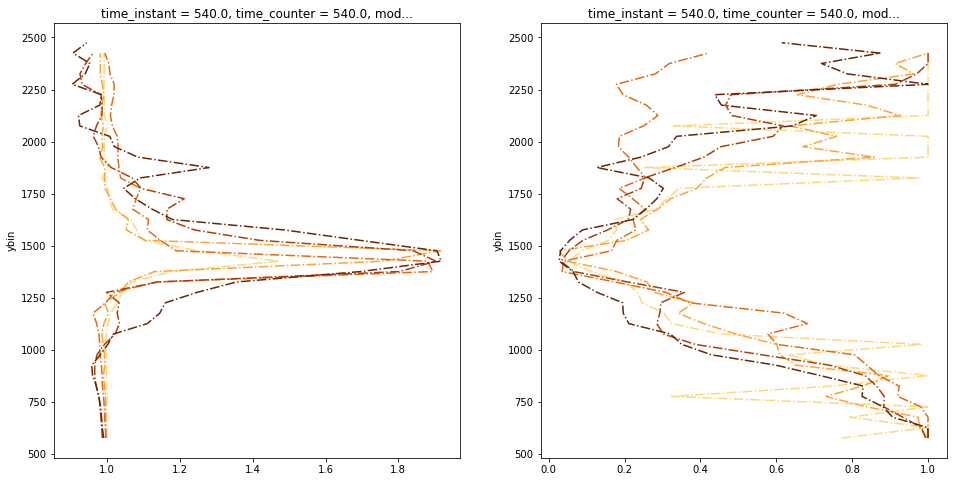

In [101]:
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
fig,ax = plt.subplots(1,2,figsize=(16,8))
for i,d in enumerate(ds):
    phi_sigma(Tl[i],Tbmean[i]).plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    phi_mu(Tl[i],Tbmean[i]).plot.line('-.',ax=ax[1],y='ybin',c=colors[i])

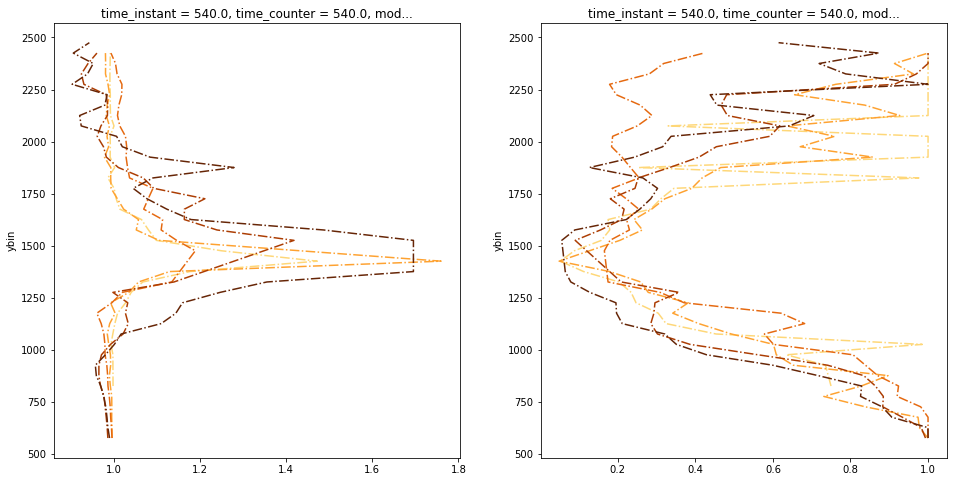

In [103]:
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
fig,ax = plt.subplots(1,2,figsize=(16,8))
for i,d in enumerate(ds):
    phi_sigma(Tl_sat[i],Tbmean_sat[i]).plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    phi_mu(Tl_sat[i],Tbmean_sat[i]).plot.line('-.',ax=ax[1],y='ybin',c=colors[i])

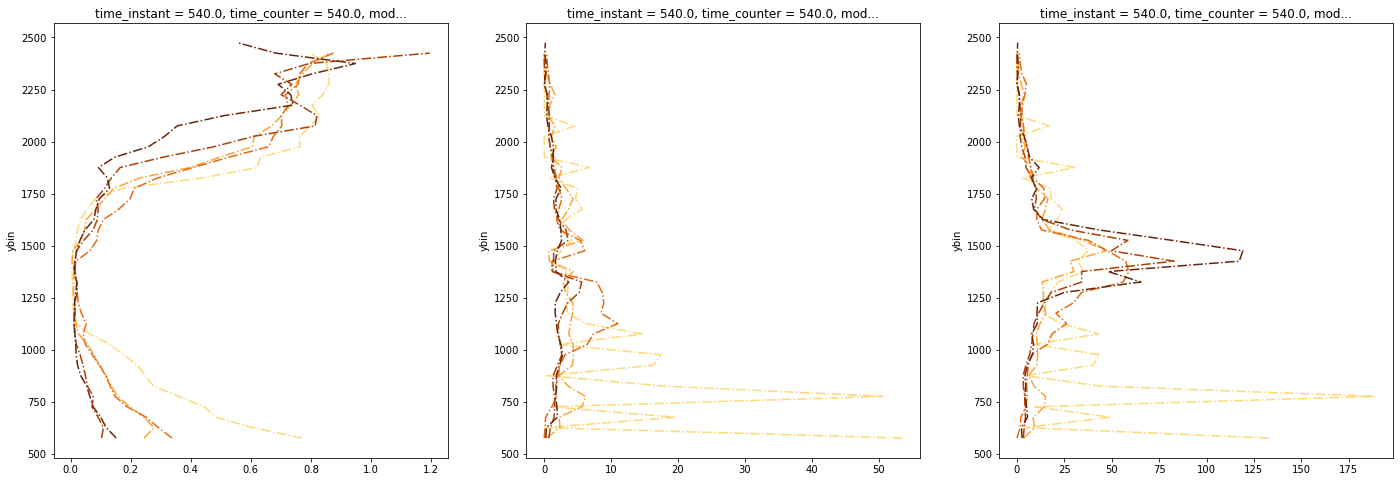

In [14]:
fig,ax = plt.subplots(1,3,figsize=(24,8))
for i,d in enumerate(ds):
    x1 = Tl[i]/Te[i]
    x2 = Tbmean[i]**2*phi_mu(Tl[i],Tbmean[i])**2*(2*np.pi/d.Ta)**2
    x3 = (2*np.pi/d.Ta)**2*Tl[i]*Tbmean[i]*phi_sigma(Tl[i],Tbmean[i])
    x1.plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    x2.plot.line('-.',ax=ax[1],y='ybin',c=colors[i])
    x3.plot.line('-.',ax=ax[2],y='ybin',c=colors[i])

(0.0, 1.2)

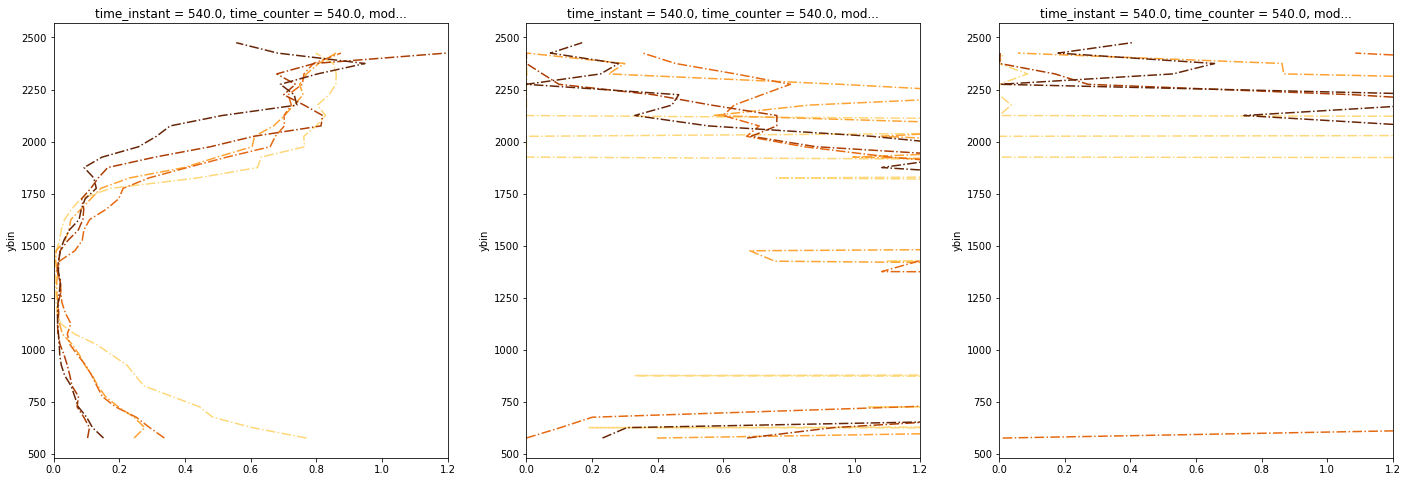

In [20]:
fig,ax = plt.subplots(1,3,figsize=(24,8))
for i,d in enumerate(ds):
    x1 = Tl[i]/Te[i]
    x2 = Tbmean[i]**2*phi_mu(Tl[i],Tbmean[i])**2*(2*np.pi/d.Ta)**2
    x3 = (2*np.pi/d.Ta)**2*Tl[i]*Tbmean[i]*phi_sigma(Tl[i],Tbmean[i])
    x1.plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    x2.plot.line('-.',ax=ax[1],y='ybin',c=colors[i])
    x3.plot.line('-.',ax=ax[2],y='ybin',c=colors[i])
ax[0].set_xlim(0,1.2);ax[1].set_xlim(0,1.2);ax[2].set_xlim(0,1.2)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

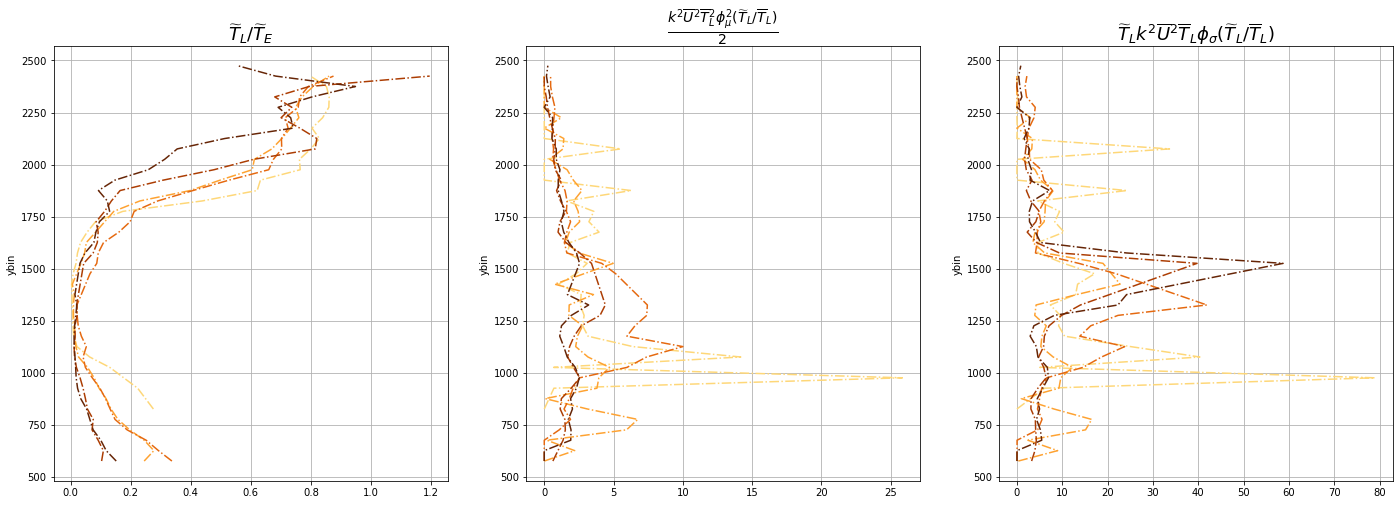

In [178]:
fig,ax = plt.subplots(1,3,figsize=(24,8))
for i,d in enumerate(ds):
    x1 = Tl_sat[i]/Te_sat[i]
    x2 = Tbl_sat[i]**2*phi_mu(Tl_sat[i],Tbl_sat[i])**2*(2*np.pi/d.Ta.where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True))**2
    x3 = (2*np.pi/d.Ta.where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True))**2*Tl_sat[i]*Tbl_sat[i]*phi_sigma(Tl_sat[i],Tbl_sat[i])
    x1.plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    x2.plot.line('-.',ax=ax[1],y='ybin',c=colors[i])
    x3.plot.line('-.',ax=ax[2],y='ybin',c=colors[i])
ax[0].grid();ax[1].grid();ax[2].grid()
ax[0].set_title(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=18);
ax[1].set_title(r'$\frac{k^2\overline{U}^2\overline{T}_L^2\phi_{\mu}^2(\widetilde{T}_L/\overline{T}_L)}{2}$',fontsize=20);
ax[2].set_title(r'$\widetilde{T}_Lk^2\overline{U}^2\overline{T}_L\phi_{\sigma}(\widetilde{T}_L/\overline{T}_L)$',fontsize=18)
fig.savefig('/Users/zcaspar/codes/dominant_terms.eps')

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

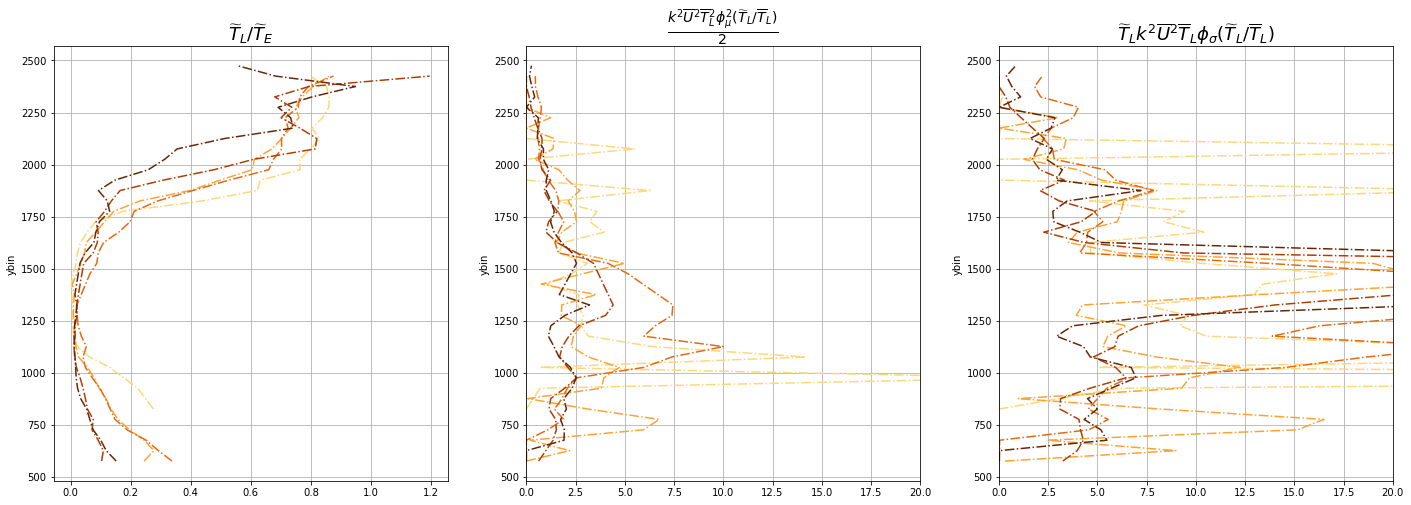

In [180]:
fig,ax = plt.subplots(1,3,figsize=(24,8))
for i,d in enumerate(ds):
    x1 = Tl_sat[i]/Te_sat[i]
    x2 = Tbl_sat[i]**2*phi_mu(Tl_sat[i],Tbl_sat[i])**2*(2*np.pi/d.Ta.where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True))**2
    x3 = (2*np.pi/d.Ta.where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True))**2*Tl_sat[i]*Tbl_sat[i]*phi_sigma(Tl_sat[i],Tbl_sat[i])
    x1.plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    x2.plot.line('-.',ax=ax[1],y='ybin',c=colors[i])
    x3.plot.line('-.',ax=ax[2],y='ybin',c=colors[i])
ax[1].set_xlim(0,20);ax[2].set_xlim(0,20)
ax[0].grid();ax[1].grid();ax[2].grid()
ax[0].set_title(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=18);
ax[1].set_title(r'$\frac{k^2\overline{U}^2\overline{T}_L^2\phi_{\mu}^2(\widetilde{T}_L/\overline{T}_L)}{2}$',fontsize=20);
ax[2].set_title(r'$\widetilde{T}_Lk^2\overline{U}^2\overline{T}_L\phi_{\sigma}(\widetilde{T}_L/\overline{T}_L)$',fontsize=18)
fig.savefig('/Users/zcaspar/codes/dominant_terms_zoom.eps')

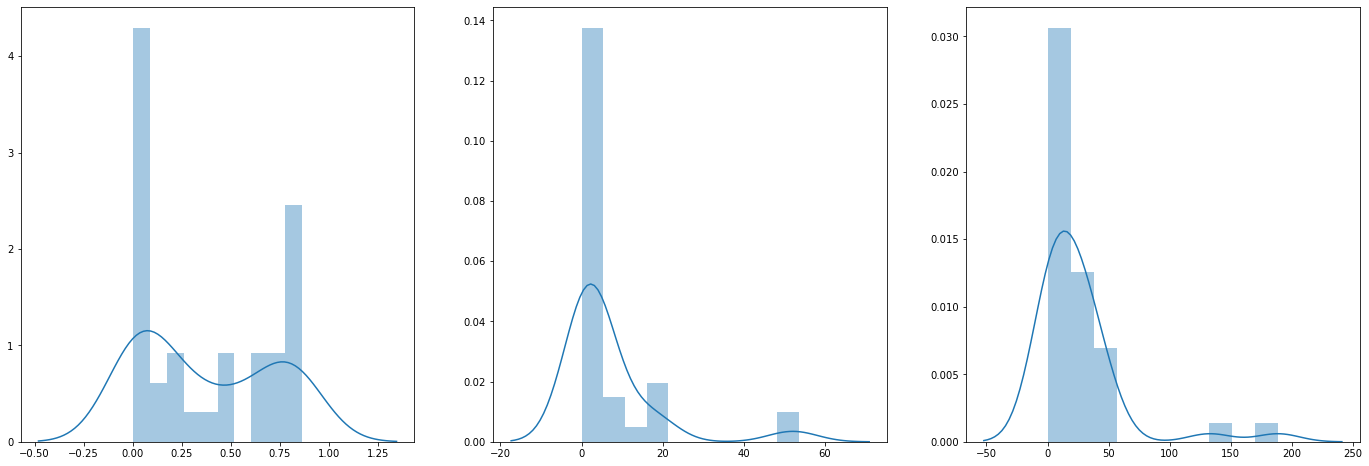

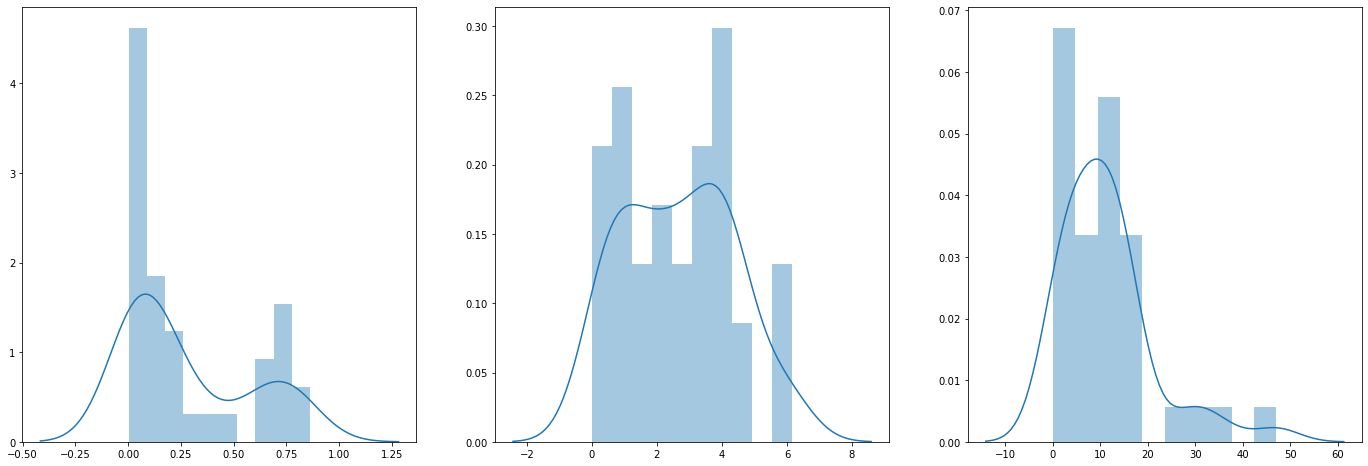

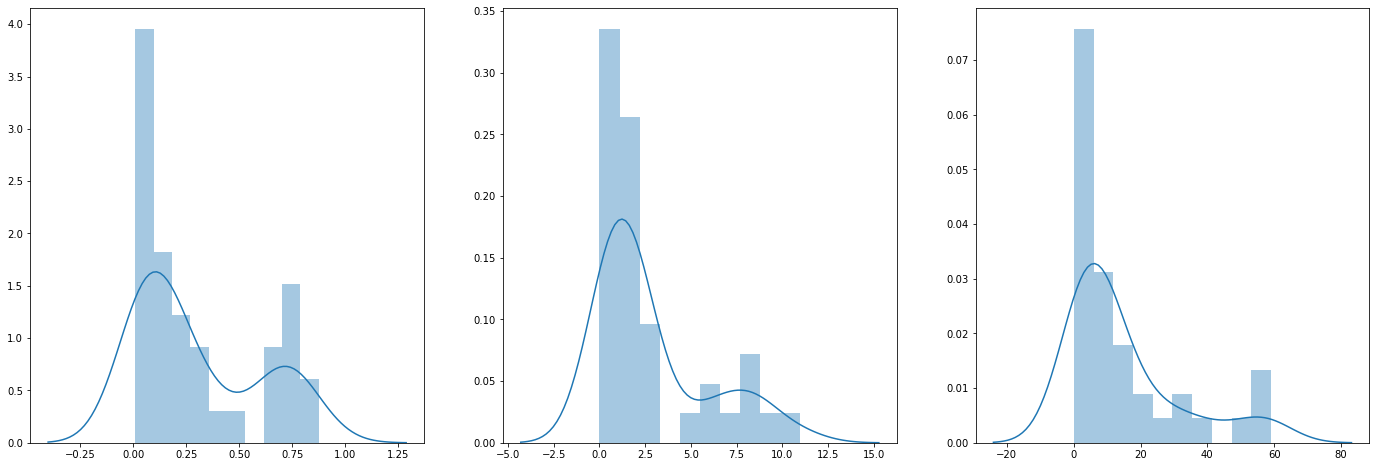

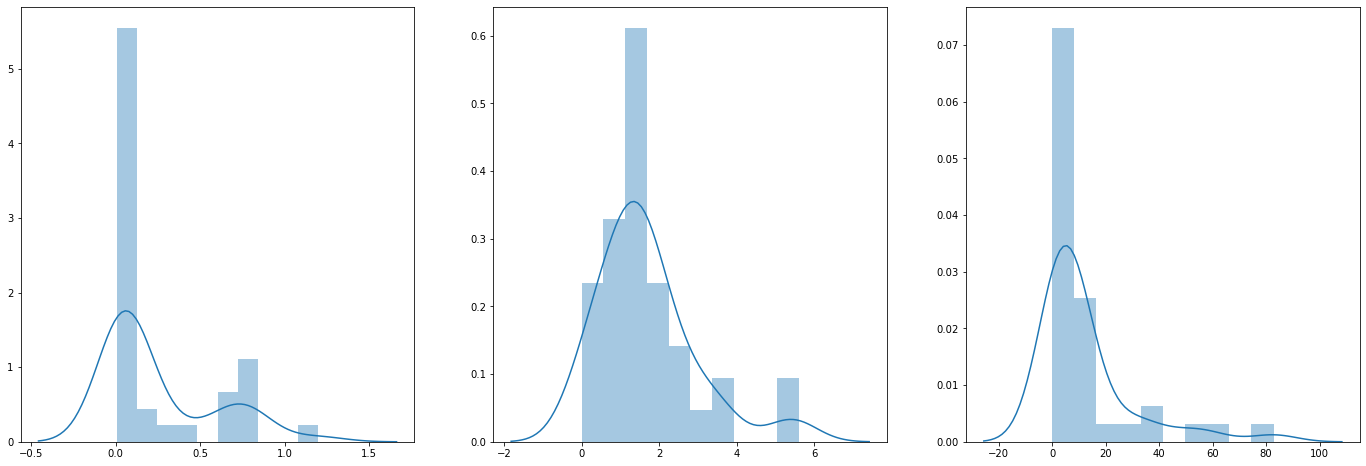

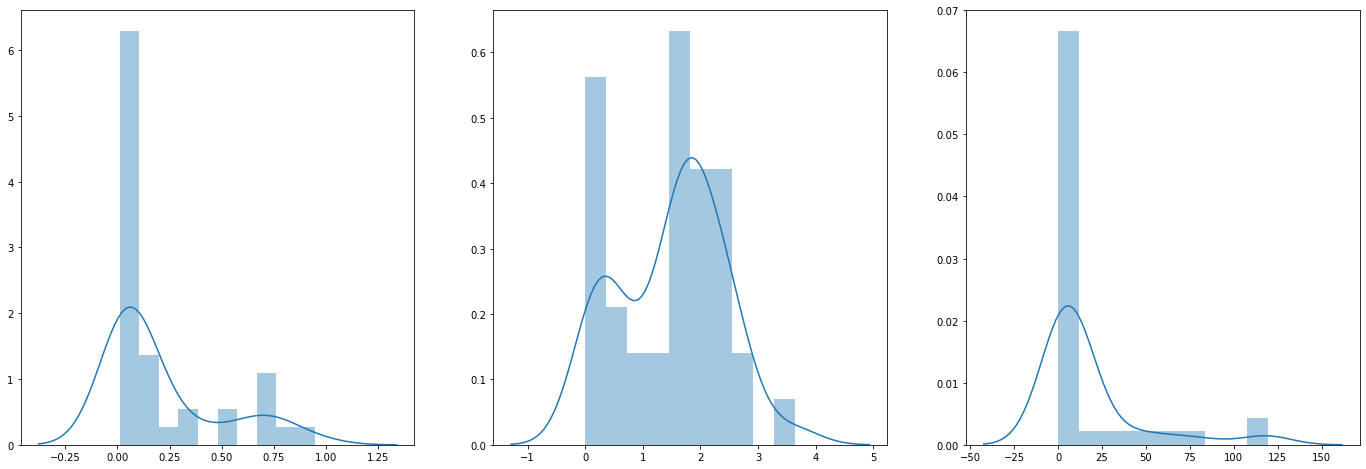

In [107]:
#fig,ax = plt.subplots(1,3,figsize=(24,8))
for i,d in enumerate(ds):
    x1 = Tl[i]/Te[i]
    x2 = Tbmean[i]**2*phi_mu(Tl[i],Tbmean[i])**2*(2*np.pi/d.Ta)**2
    x3 = (2*np.pi/d.Ta)**2*Tl[i]*Tbmean[i]*phi_sigma(Tl[i],Tbmean[i])
    fig,ax  = plt.subplots(1,3,figsize=(24,8))
    sns.distplot(x1,kde=True,ax=ax[0],bins=10)
    sns.distplot(x2,kde=True,ax=ax[1],bins=10)
    sns.distplot(x3,kde=True,ax=ax[2],bins=10)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

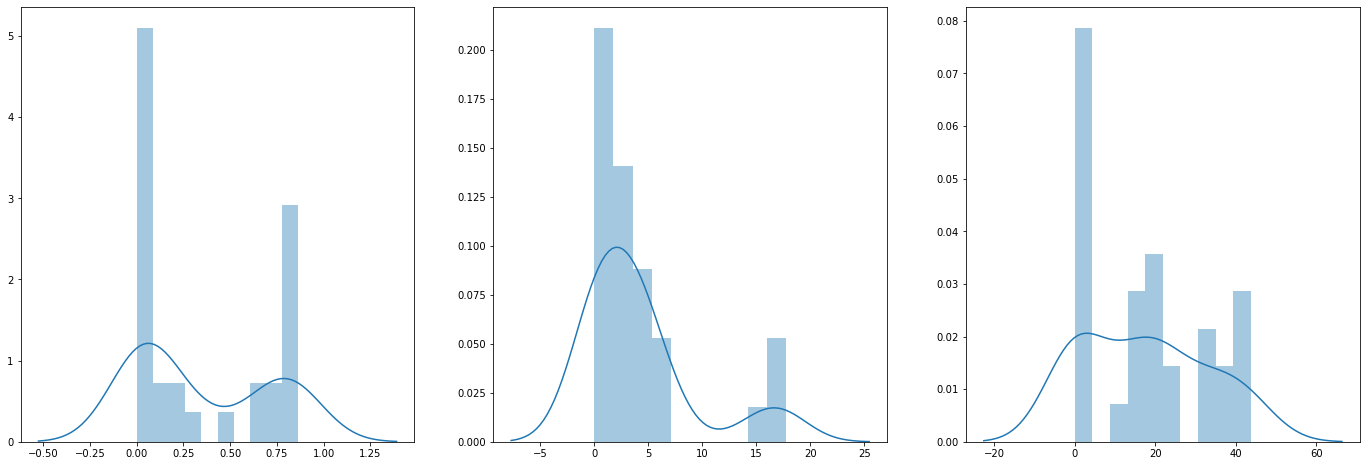

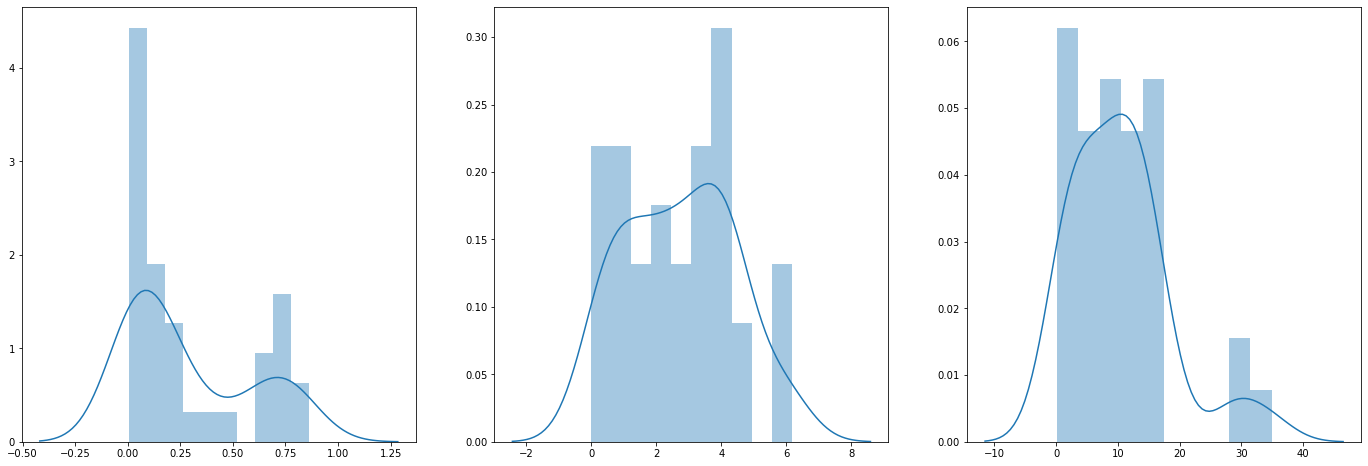

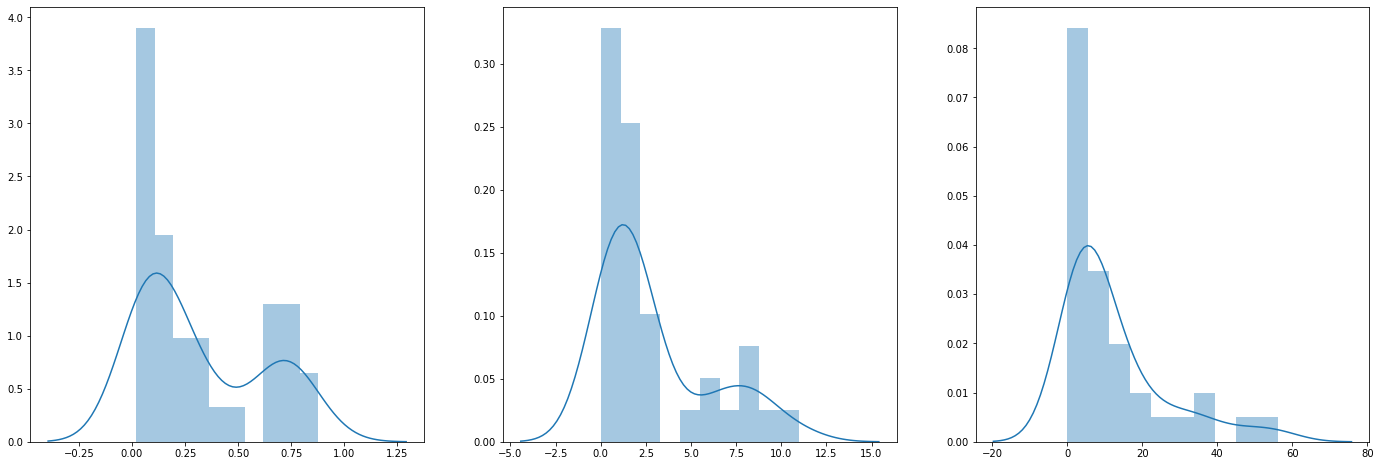

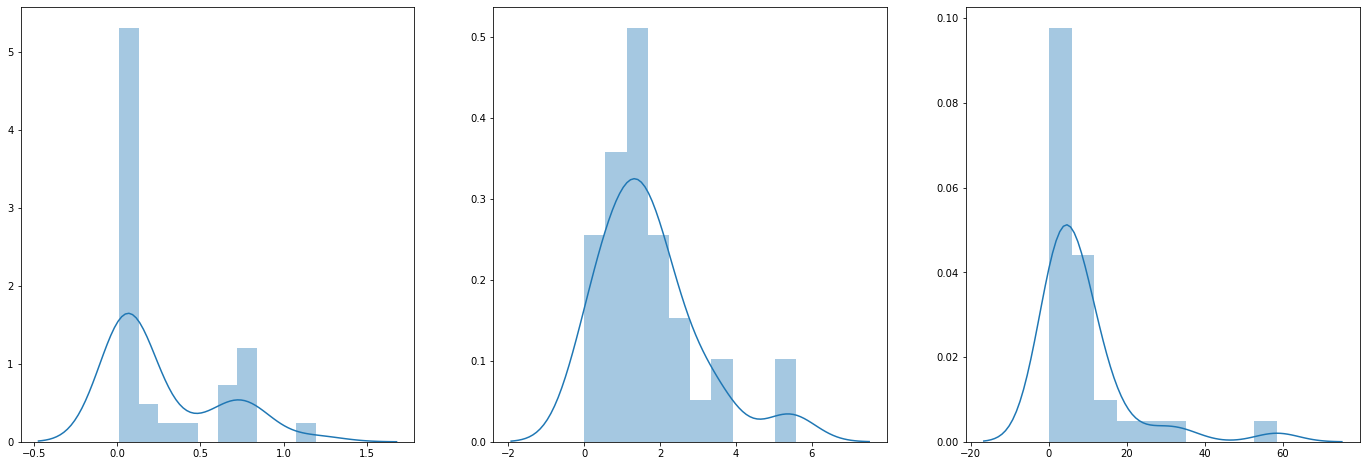

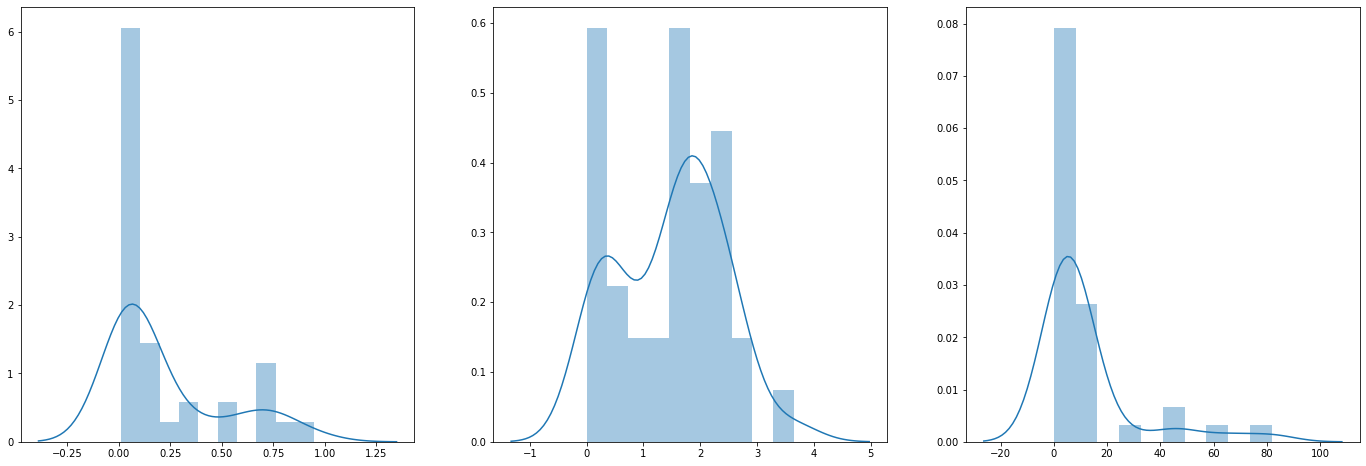

In [108]:
for i,d in enumerate(ds):
    x1 = Tl_sat[i]/Te_sat[i]
    x2 = Tbmean_sat[i]**2*phi_mu(Tl_sat[i],Tbmean_sat[i])**2*(2*np.pi/d.Ta)**2
    x3 = (2*np.pi/d.Ta)**2*Tl_sat[i]*Tbmean_sat[i]*phi_sigma(Tl_sat[i],Tbmean_sat[i])
    fig,ax  = plt.subplots(1,3,figsize=(24,8))
    sns.distplot(x1,kde=True,ax=ax[0],bins=10)
    sns.distplot(x2,kde=True,ax=ax[1],bins=10)
    sns.distplot(x3,kde=True,ax=ax[2],bins=10)

In [109]:
X1,X2,X3 = np.array([]),np.array([]),np.array([])
for i,d in enumerate(ds):
    X1 = np.insert(X1,0,(Tl_sat[i]/Te_sat[i]).values)
    X2 = np.insert(X2,0,(Tbmean_sat[i]**2*phi_mu(Tl_sat[i],Tbmean_sat[i])**2*(2*np.pi/d.Ta)**2).values)
    X3 = np.insert(X3,0,((2*np.pi/d.Ta)**2*Tl_sat[i]*Tbmean_sat[i]*phi_sigma(Tl_sat[i],Tbmean_sat[i])).values)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

<AxesSubplot:>

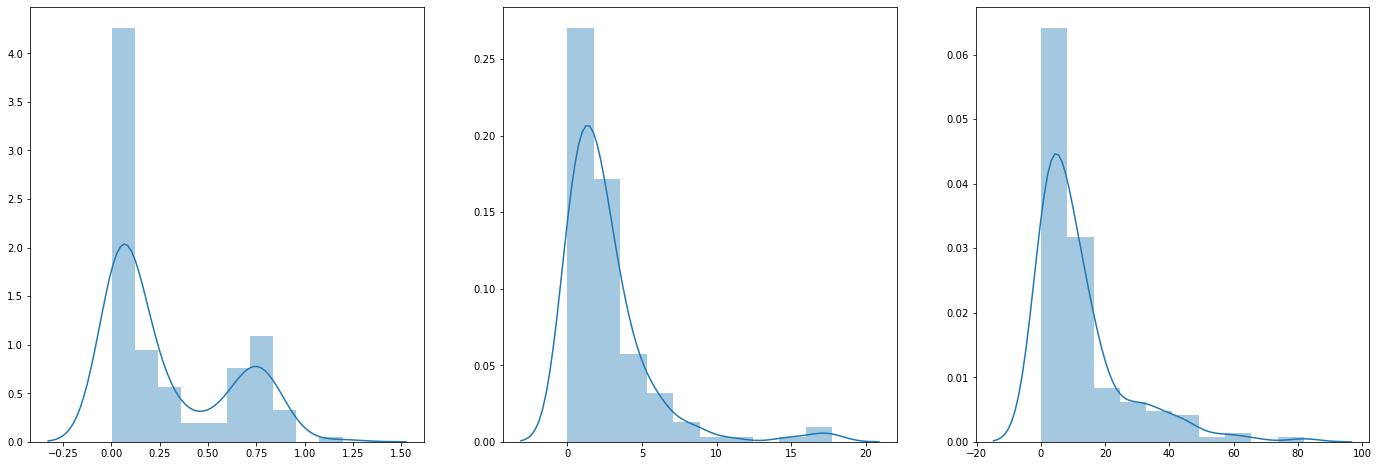

In [111]:
fig, ax = plt.subplots(1,3,figsize=(24,8))
sns.distplot(X1,ax=ax[0],kde=True,bins=10)
sns.distplot(X2,ax=ax[1],kde=True,bins=10)
sns.distplot(X3,ax=ax[2],kde=True,bins=10)

In [112]:
tau = np.arange(0,100,10/(24*60))

In [125]:
Tau,TE = np.meshgrid(tau,Te_sat[0])
Tau,Tbm = np.meshgrid(tau,Tbmean_sat[0])
TA = np.meshgrid(tau,ds[0].Ta.where(Tl[0]>=1.1,drop=True).where(Te[0]<=2000,drop=True))[1]

#x2 = Tbmean_sat[i]**2*phi_mu(Tl_sat[i],Tbmean_sat[i])**2*(2*np.pi/ds.Ta)**2
#x3 = (2*np.pi/d.Ta)**2*Tl_sat[i]*Tbmean_sat[i]*phi_sigma(Tl_sat[i],Tbmean_sat[i])

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


In [126]:
xx2 = xr.DataArray(Tbm**2*phi_mu(Tau,Tbm)**2*(2*np.pi/TA)**2,dims=['y_bins','tau'],coords={'y_bins':Te_sat[0].ybin.values,'tau':tau})
xx1 = xr.DataArray(Tau/TE,dims=['y_bins','tau'],coords={'y_bins':Te_sat[0].ybin.values,'tau':tau})
xx3 = xr.DataArray((2*np.pi/TA)**2*Tau*Tbm*phi_sigma(Tau,Tbm),dims=['y_bins','tau'],coords={'y_bins':Te_sat[0].ybin.values,'tau':tau})

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


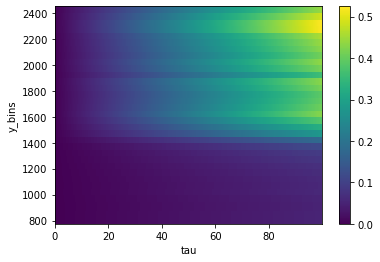

In [127]:
xx1.plot(add_colorbar=True)

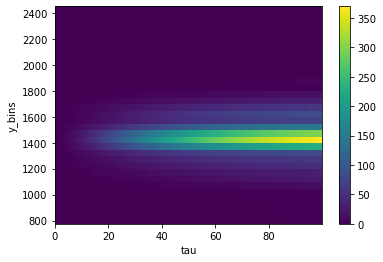

In [128]:
xx2.plot()

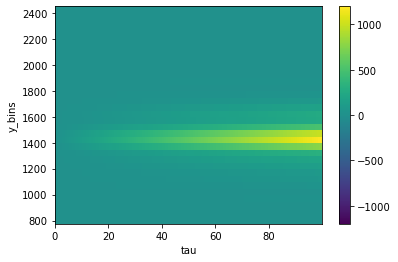

In [133]:
xx3.plot(cmap='viridis')

In [134]:
Tl_sat[0].max()

<xarray.DataArray 'L_u_avg' ()>
array(523.18782821)
Coordinates:
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'

<AxesSubplot:>

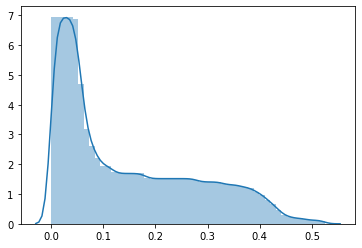

In [150]:
sns.distplot(xx1)

<AxesSubplot:>

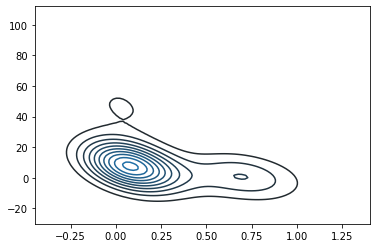

In [149]:
sns.kdeplot(x1,x3)